In [40]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2595 - acc: 0.9247
Epoch 2/4
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1041 - acc: 0.9680
Epoch 3/4
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0709 - acc: 0.9779
Epoch 4/4
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0528 - acc: 0.9831


In [23]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.0960 - acc: 0.9691
0.09597653313577176 0.9691


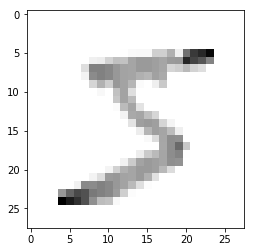

In [19]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
# print(x_train[0])


In [41]:
model.save('epic_num_reader.model')

In [42]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [43]:
import numpy as np

array = np.array(x_test)

predictions = new_model.predict(array)

In [44]:
for i in range(0, 10):
    print(np.argmax(predictions[i]))

7
2
1
0
4
1
4
9
5
9


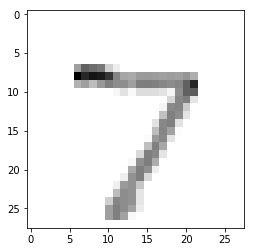

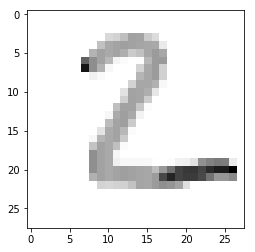

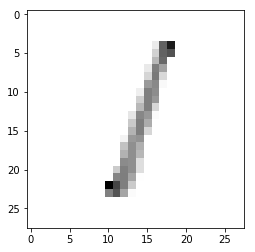

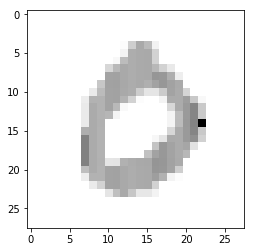

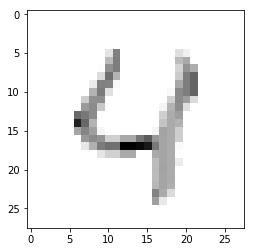

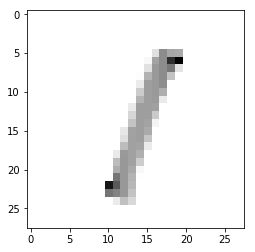

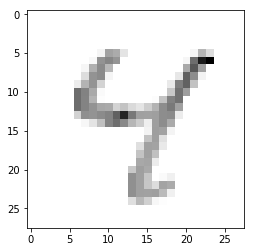

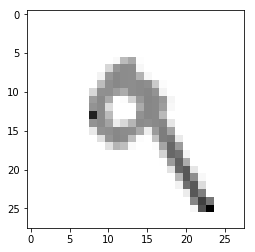

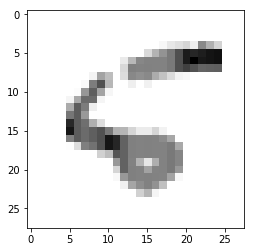

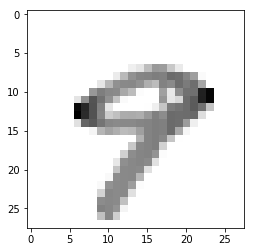

In [45]:
for i in range(0, 10):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.show()